In [572]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
import numpy as np

In [1144]:
ligue = pd.read_csv(r'C:\Users\melan\Downloads\F12020.csv', index_col=0)
ligu2 = pd.read_csv(r'C:\Users\melan\Downloads\F12022.csv', index_col=0)
ligu3 = pd.read_csv(r'C:\Users\melan\Downloads\F12019.csv', index_col=0)
ligu4 = pd.read_csv(r'C:\Users\melan\Downloads\F12018.csv', index_col=0)

frames = [ligue,ligu2, ligu3, ligu4]

championa = pd.concat(frames)

'''
HY = Home Team Yellow Cards
AY = Away Team Yellow Cards
HR = Home Team Red Cards
AR = Away Team Red Cards

'''

ligue['C']  = ligue['HY'] + ligue['AY'] + ligue['HR'] + ligue['AR']
ligue['CH'] = ligue['HY'] + ligue['HR'] 
ligue['CA'] = ligue['AY'] + ligue['AR']

In [1145]:
df = ligue[['HomeTeam', 'AwayTeam', 'HY', 'AY', 'HR','AR','CH','CA','C']]
df

,HomeTeam,AwayTeam,HY,AY,HR,AR,CH,CA,C
Div,,,,,,,,,
F1,Bordeaux,Nantes,2,3,1,0,3,3,6
F1,Dijon,Angers,0,0,0,0,0,0,0
F1,Lille,Rennes,0,1,1,1,1,2,3
F1,Monaco,Reims,1,3,0,0,1,3,4
F1,Lorient,Strasbourg,3,2,0,0,3,2,5
...,...,...,...,...,...,...,...,...,...
F1,Nantes,Montpellier,2,2,0,0,2,2,4
F1,Reims,Bordeaux,1,1,0,0,1,1,2
F1,Rennes,Nimes,1,0,0,0,1,0,1


In [1146]:
df_home = df[(df['HomeTeam'] == 'Paris SG')][['HomeTeam', 'AwayTeam', 'CH','C']]
df_away = df[(df['AwayTeam'] == 'Paris SG')][['HomeTeam', 'AwayTeam', 'CA','C']]
df_away.rename(columns={"CA":"CP"}, inplace=True)
df_away.head()

,HomeTeam,AwayTeam,CP,C
Div,,,,
F1,Lens,Paris SG,2,4
F1,Nice,Paris SG,2,3
F1,Reims,Paris SG,2,4
F1,Nimes,Paris SG,2,4
F1,Nantes,Paris SG,1,3


In [1147]:
df_home.rename(columns={"CH":"CP"}, inplace=True)
df_home.head()

,HomeTeam,AwayTeam,CP,C
Div,,,,
F1,Paris SG,Marseille,9,19
F1,Paris SG,Metz,4,6
F1,Paris SG,Angers,1,3
F1,Paris SG,Dijon,0,2
F1,Paris SG,Rennes,3,3


In [1148]:
df_psg=pd.concat([df_home,df_away])
df_psg.head()

,HomeTeam,AwayTeam,CP,C
Div,,,,
F1,Paris SG,Marseille,9,19
F1,Paris SG,Metz,4,6
F1,Paris SG,Angers,1,3
F1,Paris SG,Dijon,0,2
F1,Paris SG,Rennes,3,3


In [1149]:
df_psg.shape 
df_psg.info()
df_psg.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 38 entries, F1 to F1
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   HomeTeam  38 non-null     object
 1   AwayTeam  38 non-null     object
 2   CP        38 non-null     int64 
 3   C         38 non-null     int64 
dtypes: int64(2), object(2)
memory usage: 1.5+ KB


,CP,C
count,38.000000,38.000000
mean,2.263158,4.052632
std,1.855368,3.303948
min,0.000000,0.000000
25%,1.000000,2.000000
50%,2.000000,3.500000
75%,3.000000,5.000000
max,9.000000,19.000000


<AxesSubplot:ylabel='Frequency'>

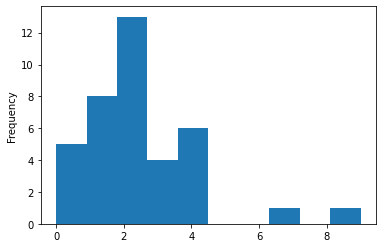

In [1150]:
df_psg.CP.plot.hist()

In [1151]:
df_psg.CP.value_counts(normalize=True)

2    0.342105
1    0.210526
4    0.157895
0    0.131579
3    0.105263
9    0.026316
7    0.026316
Name: CP, dtype: float64

In [1152]:
pd.crosstab(df_psg['HomeTeam'], df_psg['CP'], normalize=True, margins=True) * 100 

CP,0,1,2,3,4,7,9,All
HomeTeam,,,,,,,,
Angers,0.000000,0.000000,2.631579,0.000000,0.000000,0.000000,0.000000,2.631579
Bordeaux,0.000000,0.000000,0.000000,2.631579,0.000000,0.000000,0.000000,2.631579
Brest,0.000000,0.000000,2.631579,0.000000,0.000000,0.000000,0.000000,2.631579
Dijon,0.000000,2.631579,0.000000,0.000000,0.000000,0.000000,0.000000,2.631579
Lens,0.000000,0.000000,2.631579,0.000000,0.000000,0.000000,0.000000,2.631579
Lille,0.000000,0.000000,2.631579,0.000000,0.000000,0.000000,0.000000,2.631579
Lorient,0.000000,0.000000,2.631579,0.000000,0.000000,0.000000,0.000000,2.631579
Lyon,2.631579,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.631579
Marseille,0.000000,0.000000,2.631579,0.000000,0.000000,0.000000,0.000000,2.631579


In [1153]:
pd.crosstab(df_psg['AwayTeam'], df_psg['CP'], normalize=True, margins=True) * 100 

CP,0,1,2,3,4,7,9,All
AwayTeam,,,,,,,,
Angers,0.000000,2.631579,0.000000,0.000000,0.000000,0.000000,0.000000,2.631579
Bordeaux,0.000000,2.631579,0.000000,0.000000,0.000000,0.000000,0.000000,2.631579
Brest,0.000000,2.631579,0.000000,0.000000,0.000000,0.000000,0.000000,2.631579
Dijon,2.631579,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.631579
Lens,0.000000,0.000000,0.000000,0.000000,2.631579,0.000000,0.000000,2.631579
Lille,0.000000,0.000000,0.000000,0.000000,0.000000,2.631579,0.000000,2.631579
Lorient,0.000000,0.000000,0.000000,2.631579,0.000000,0.000000,0.000000,2.631579
Lyon,0.000000,0.000000,0.000000,0.000000,2.631579,0.000000,0.000000,2.631579
Marseille,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.631579,2.631579


In [1154]:
df_psg.loc[(df_psg.AwayTeam == 'Paris SG'),'AwayTeam']=1
df_psg.loc[(df_psg.AwayTeam != 'Paris SG'),'AwayTeam']=0

df_psg.loc[(df_psg.HomeTeam != 'Paris SG'),'HomeTeam']=0
df_psg.loc[(df_psg.HomeTeam == 'Paris SG'),'HomeTeam']=1



x = df_psg.drop('CP',axis=1)
y = df_psg['CP']
'''
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le
le.fit(df_psg.CP)
df_psg=le.transform(df_psg.CP)
df_psg
'''

'\nfrom sklearn.preprocessing import LabelEncoder\nle = LabelEncoder()\nle\nle.fit(df_psg.CP)\ndf_psg=le.transform(df_psg.CP)\ndf_psg\n'

In [1155]:
x_train, x_test, y_train, y_test = train_test_split(x, y ,test_size=0.3,random_state=42)

In [1156]:
y_train_sf

Div
F1    3
F1    4
F1    2
F1    2
F1    2
F1    0
F1    4
F1    2
F1    1
F1    2
F1    2
F1    2
F1    1
F1    2
Name: CA, dtype: int64

In [1157]:
y_train_sf.value_counts(normalize=True)

2    0.571429
4    0.142857
1    0.142857
3    0.071429
0    0.071429
Name: CA, dtype: float64

In [1158]:
y_test_sf

Div
F1    2
F1    1
F1    1
F1    3
F1    2
Name: CA, dtype: int64

In [1159]:
y_test_sf.value_counts(normalize=True)

2    0.4
1    0.4
3    0.2
Name: CA, dtype: float64

In [1160]:
x

,HomeTeam,AwayTeam,C
Div,,,
F1,1,0,19
F1,1,0,6
F1,1,0,3
F1,1,0,2
F1,1,0,3
F1,1,0,2
F1,1,0,6
F1,1,0,4
F1,1,0,0


In [1161]:
np.array(y)

array([9, 4, 1, 0, 3, 1, 4, 3, 0, 1, 2, 0, 2, 4, 2, 7, 1, 4, 0, 2, 2, 2,
       2, 1, 4, 3, 2, 1, 2, 2, 2, 1, 3, 0, 1, 4, 2, 2], dtype=int64)

In [1162]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [1163]:
y_pred = knn.predict(x_test)
y_pred

array([2, 3, 1, 4, 2, 2, 4, 2, 3, 4, 4, 0], dtype=int64)

In [1164]:
y_test

Div
F1    0
F1    2
F1    3
F1    4
F1    2
F1    2
F1    4
F1    1
F1    4
F1    7
F1    4
F1    0
Name: CP, dtype: int64

In [1165]:
acc = knn.score(x_test, y_test)
acc

0.5

In [1166]:
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test, y_pred)
conf_mat

array([[1, 0, 1, 0, 0, 0],
       [0, 0, 1, 0, 0, 0],
       [0, 0, 2, 1, 0, 0],
       [0, 1, 0, 0, 0, 0],
       [0, 0, 0, 1, 3, 0],
       [0, 0, 0, 0, 1, 0]], dtype=int64)

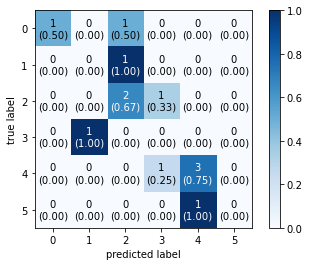

In [1167]:
from mlxtend.plotting import plot_confusion_matrix

class_names = df_psg.CP

fig, ax = plot_confusion_matrix(conf_mat=conf_mat,
                                colorbar=True,
                                show_absolute=True,
                                show_normed=True,
                        )

In [1168]:
conf_mat.diagonal().sum()/conf_mat.sum()

0.5

In [1169]:
df_championa = df

In [1170]:
df_championa.loc[(df_championa.AwayTeam != '0'),'AwayTeam']=0
df_championa.loc[(df_championa.HomeTeam != '1'),'HomeTeam']=1
df_championa

C:\Users\melan\anaconda3\lib\site-packages\pandas\core\indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


,HomeTeam,AwayTeam,HY,AY,HR,AR,CH,CA,C
Div,,,,,,,,,
F1,1,0,2,3,1,0,3,3,6
F1,1,0,0,0,0,0,0,0,0
F1,1,0,0,1,1,1,1,2,3
F1,1,0,1,3,0,0,1,3,4
F1,1,0,3,2,0,0,3,2,5
...,...,...,...,...,...,...,...,...,...
F1,1,0,2,2,0,0,2,2,4
F1,1,0,1,1,0,0,1,1,2
F1,1,0,1,0,0,0,1,0,1


In [1171]:
x = df_championa.drop('C',axis=1)
y = df_championa['C']

In [1172]:
x

,HomeTeam,AwayTeam,HY,AY,HR,AR,CH,CA
Div,,,,,,,,
F1,1,0,2,3,1,0,3,3
F1,1,0,0,0,0,0,0,0
F1,1,0,0,1,1,1,1,2
F1,1,0,1,3,0,0,1,3
F1,1,0,3,2,0,0,3,2
...,...,...,...,...,...,...,...,...
F1,1,0,2,2,0,0,2,2
F1,1,0,1,1,0,0,1,1
F1,1,0,1,0,0,0,1,0


In [1173]:
y

Div
F1    6
F1    0
F1    3
F1    4
F1    5
     ..
F1    4
F1    2
F1    1
F1    1
F1    2
Name: C, Length: 380, dtype: int64

In [1174]:
x_train, x_test, y_train, y_test = train_test_split(x, y ,test_size=0.4,random_state=42)

In [1175]:
y_train_sf.value_counts(normalize=True)

2    0.571429
4    0.142857
1    0.142857
3    0.071429
0    0.071429
Name: CA, dtype: float64

In [1176]:
y_test_sf.value_counts(normalize=True)

2    0.4
1    0.4
3    0.2
Name: CA, dtype: float64

In [1177]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [1178]:
y_pred = knn.predict(x_test)
y_pred

array([2, 3, 3, 6, 3, 4, 7, 2, 1, 5, 4, 7, 4, 6, 6, 4, 6, 3, 3, 3, 6, 4,
       5, 5, 8, 6, 4, 7, 7, 3, 2, 4, 2, 3, 4, 2, 5, 2, 1, 2, 3, 2, 3, 9,
       2, 0, 6, 5, 2, 2, 6, 6, 2, 3, 5, 6, 4, 5, 7, 9, 6, 4, 2, 4, 6, 2,
       4, 4, 2, 3, 1, 1, 4, 6, 7, 3, 7, 3, 1, 3, 4, 3, 1, 0, 2, 6, 4, 3,
       4, 4, 0, 6, 0, 7, 8, 1, 6, 4, 3, 4, 6, 2, 3, 4, 3, 6, 5, 4, 7, 6,
       4, 6, 4, 0, 4, 6, 4, 4, 6, 6, 1, 6, 4, 4, 6, 4, 3, 4, 2, 6, 3, 7,
       5, 3, 4, 2, 3, 4, 3, 5, 3, 5, 5, 2, 3, 6, 3, 2, 6, 8, 7, 3],
      dtype=int64)

In [1179]:
y_test

Div
F1    2
F1    3
F1    4
F1    6
F1    3
     ..
F1    2
F1    6
F1    8
F1    7
F1    3
Name: C, Length: 152, dtype: int64

In [1180]:
acc = knn.score(x_test, y_test)
acc

0.9078947368421053

In [1181]:
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test, y_pred)
conf_mat

array([[ 5,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  8,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 21,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 28,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  1, 31,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  2, 10,  2,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  2, 24,  1,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  2,  8,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  2,  2,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  1,  1,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0]], dtype=int64)

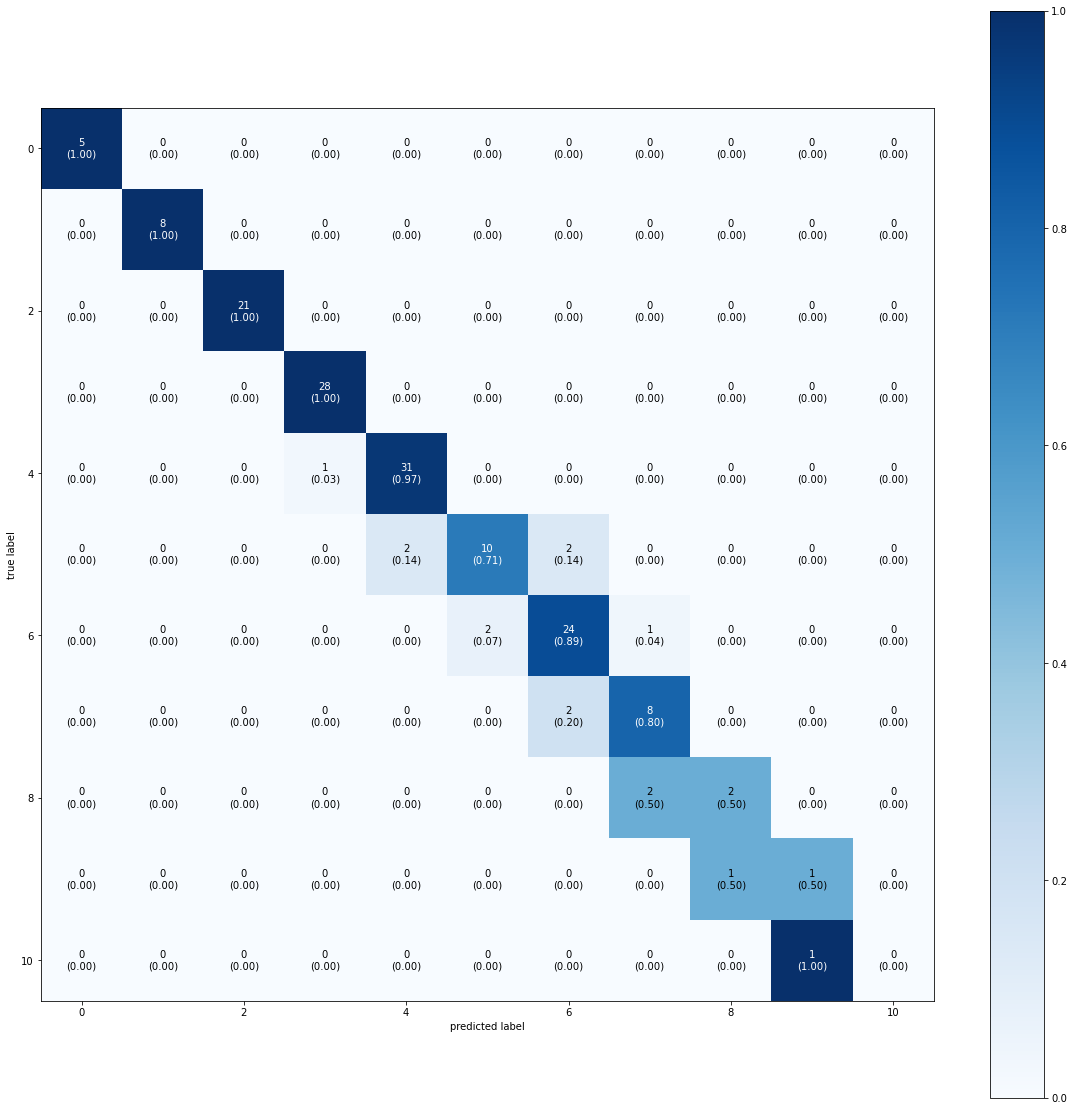

In [1182]:
from mlxtend.plotting import plot_confusion_matrix

fig, ax = plot_confusion_matrix(conf_mat=conf_mat,
                                colorbar=True,
                                show_absolute=True,
                                show_normed=True,figsize=(20, 20)                      )

In [1183]:
conf_mat.diagonal().sum()/conf_mat.sum()

0.9078947368421053

In [1184]:
championa.loc[(championa.AwayTeam != '0'),'AwayTeam']=0
championa.loc[(championa.HomeTeam != '1'),'HomeTeam']=1
championa['C']  = championa['HY'] + championa['AY'] + championa['HR'] + championa['AR']
championa['CH'] = championa['HY'] + championa['HR'] 
championa['CA'] = championa['AY'] + championa['AR']
championa =  championa[['HomeTeam', 'AwayTeam', 'HY', 'AY', 'HR','AR','CH','CA','C']]
championa


,HomeTeam,AwayTeam,HY,AY,HR,AR,CH,CA,C
Div,,,,,,,,,
F1,1,0,2,3,1,0,3,3,6
F1,1,0,0,0,0,0,0,0,0
F1,1,0,0,1,1,1,1,2,3
F1,1,0,1,3,0,0,1,3,4
F1,1,0,3,2,0,0,3,2,5
...,...,...,...,...,...,...,...,...,...
F1,1,0,2,1,0,0,2,1,3
F1,1,0,2,3,0,0,2,3,5
F1,1,0,1,1,0,0,1,1,2


In [1185]:
#championa.info()
#championa.describe()
championa.C.value_counts(normalize=True)

3     0.207561
4     0.191253
5     0.158636
2     0.140104
6     0.095626
7     0.065975
1     0.054114
8     0.036323
0     0.025945
9     0.013343
10    0.005189
11    0.002965
12    0.001483
19    0.000741
13    0.000741
Name: C, dtype: float64

In [1186]:
x = championa.drop('C',axis=1)
y = championa['C']

In [1187]:
x_train, x_test, y_train, y_test = train_test_split(x, y ,test_size=0.4,random_state=42)

In [1206]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [1207]:
y_pred = knn.predict(x_test)
y_pred

array([ 4,  7,  5,  7,  3,  1,  2,  1,  6,  2,  8,  7,  3,  5,  4,  2,  2,
        3,  2,  4,  8,  4,  3,  2,  3,  4,  5,  1,  2,  7,  3,  4,  3,  5,
        4,  5,  3,  5,  6,  4,  7,  4,  4,  4,  9,  3,  4,  8,  3,  2,  6,
        8,  3,  5,  5,  5,  1,  8,  3,  3,  5,  5,  5,  5,  3,  6,  7,  5,
        0,  4,  5,  3,  8,  7,  5,  8,  8,  1,  3,  4,  3,  3,  3,  4,  5,
        5,  3,  1,  4,  6,  3,  2,  1,  3,  3,  1,  4,  3,  6,  4,  3,  3,
        4,  5,  0,  3,  5,  5,  3,  3,  5,  6,  8,  5,  4,  6,  7,  2,  7,
        2,  6,  1,  7,  4,  1,  2,  2,  8,  2,  2,  3,  5,  3,  2,  6,  3,
        4,  5,  3,  2,  3,  6,  9,  2,  6,  1,  5,  2,  5,  3, 10,  2,  5,
        2,  4,  7,  0,  7,  3,  5,  0,  3,  5,  6,  2,  5,  1,  7,  4,  5,
        3,  4,  2,  3,  9,  3,  3,  4,  3,  5,  6,  1,  6,  2,  5,  2,  3,
        4,  6,  5,  0,  3,  6,  4,  3,  0,  3,  3,  5,  2,  0,  3,  4,  7,
        4,  3,  3,  6,  1, 10,  5,  4,  5,  5,  6,  1,  4,  5,  2,  4,  3,
        6,  1,  5,  4,  5

In [1208]:
acc = knn.score(x_test, y_test)
acc

0.9574074074074074

In [1209]:
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test, y_pred)
conf_mat

array([[ 16,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,  33,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   1,  68,   2,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   2, 113,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   2,  96,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   1,  91,   1,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   5,  50,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  31,   1,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   2,  13,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   1,   5,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   3,   1,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   0,   1],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0]],
      dtype=int64)

C:\Users\melan\anaconda3\lib\site-packages\mlxtend\plotting\plot_confusion_matrix.py:94: RuntimeWarning: invalid value encountered in true_divide
  normed_conf_mat = conf_mat.astype('float') / total_samples


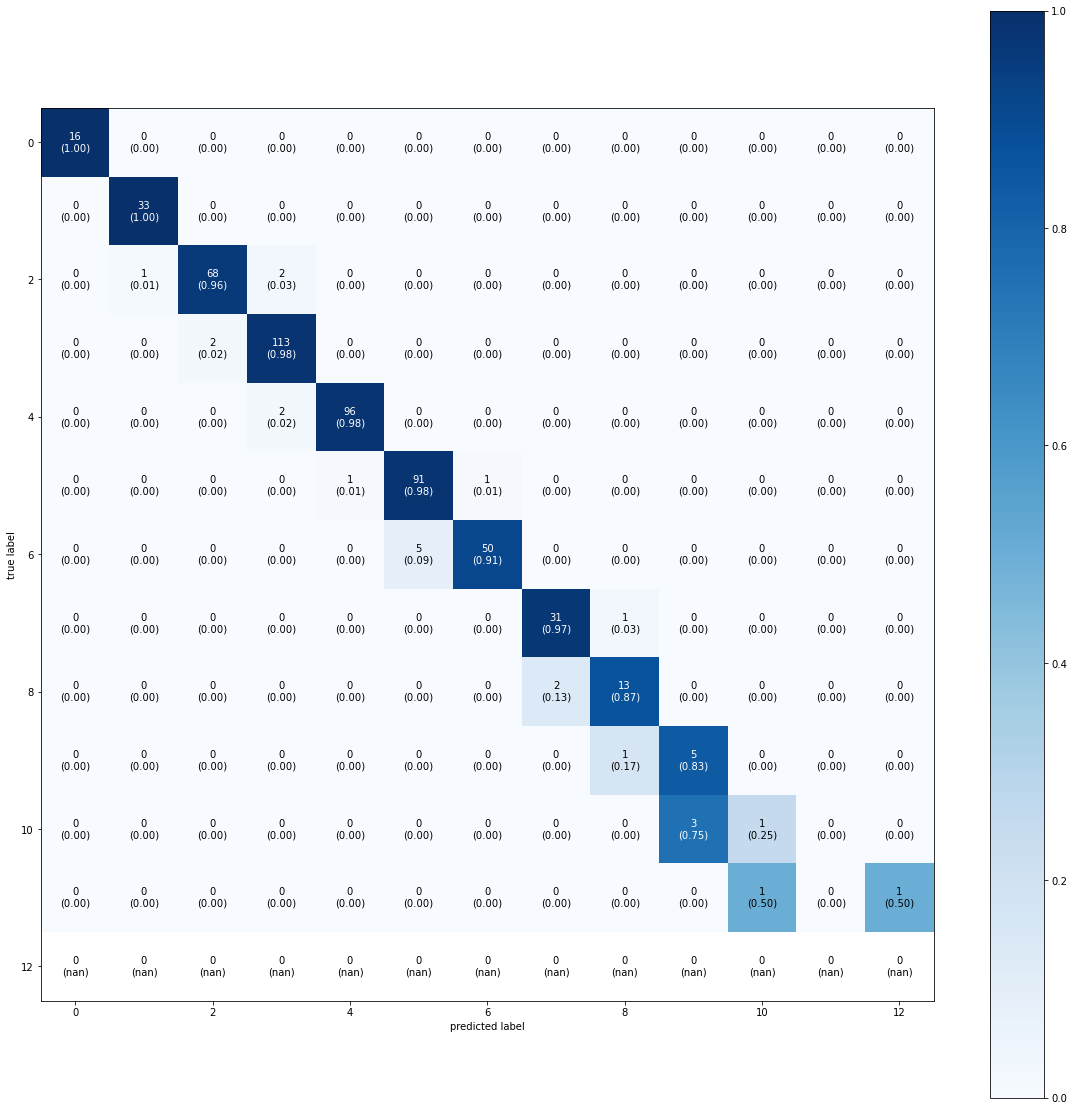

In [1210]:
from mlxtend.plotting import plot_confusion_matrix

fig, ax = plot_confusion_matrix(conf_mat=conf_mat,
                                colorbar=True,
                                show_absolute=True,
                                show_normed=True,figsize=(20, 20)                      )